# DNN Meta-Estimator architecture and performance evaluation


## Load Data

In [1]:
import pandas as pd

from data import load_data_selected_features
from pipelines_selected_features import pipeline

train_data, additional_train_data, test_data = load_data_selected_features()
all_train_data = pipeline.fit_transform(pd.concat([train_data, additional_train_data]))

# cut the data into train, additional train and test
train_data = all_train_data.loc[train_data.index]
additional_train_data = all_train_data.loc[additional_train_data.index]

X_train = train_data.drop(columns=['bg+1:00'])
y_train = train_data['bg+1:00']

X_additional_train = additional_train_data.drop(columns=['bg+1:00'])
y_additional_train = additional_train_data['bg+1:00']

## Evaluate a Basic DNN Model

12:29:24 - Start training DNN


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,761 (85.00 KB)

 Trainable params: 21,313 (83.25 KB)

 Non-trainable params: 448 (1.75 KB)

12:29:24 - Split 1/3
Epoch 1/50
8934/8934 - 7s - 759us/step - loss: 9.6116 - rmse: 2.9644 - val_loss: 4.9676 - val_rmse: 2.2004
Epoch 2/50
8934/8934 - 6s - 643us/step - loss: 5.6463 - rmse: 2.3427 - val_loss: 4.5120 - val_rmse: 2.0968
Epoch 3/50
8934/8934 - 6s - 643us/step - loss: 5.1282 - rmse: 2.2328 - val_loss: 4.4490 - val_rmse: 2.0823
Epoch 4/50
8934/8934 - 6s - 649us/step - loss: 4.9747 - rmse: 2.1992 - val_loss: 4.6143 - val_rmse: 2.1209
Epoch 5/50
8934/8934 - 6s - 641us/step - loss: 4.9062 - rmse: 2.1845 - val_loss: 4.5721 - val_rmse: 2.1108
Epoch 6/50
8934/8934 - 6s - 646us/step - loss: 4.8735 - rmse: 2.1772 - val_loss: 4.4098 - val_rmse: 2.0733
Epoch 7/50
8934/8934 - 6s - 645us/step - loss: 4.8588 - rmse: 2.1736 - val_loss: 4.3788 - val_rmse: 2.0662
Epoch 8/50
8934/8934 - 6s - 640us/step - loss: 4.8432 - rmse: 2.1705 - val_loss: 4.4609 - val_rmse: 2.0853
Epoch 9/50
8934/8934 - 6s - 646us/step - loss: 4.8215 - rmse: 2.1654 - val_loss: 4.4870 - val_rmse: 2.0916
Epoch 10/50
8934

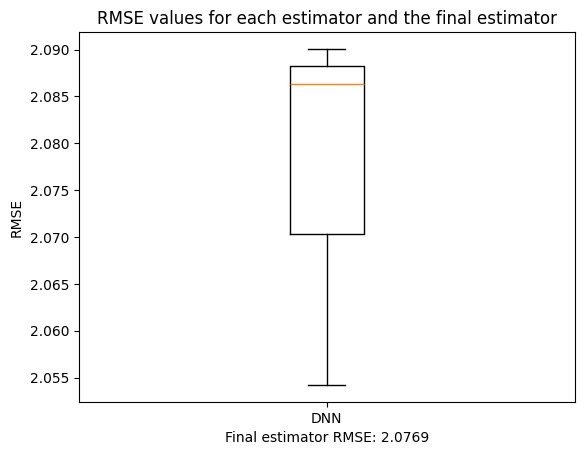

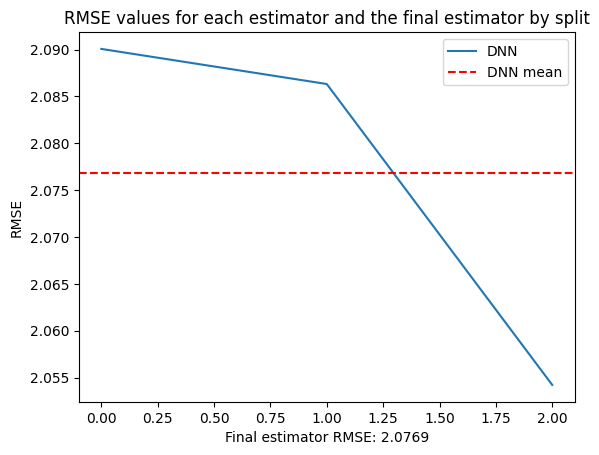

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from model_performance_calculations import calculate_dnn_performance, get_rmse_boxplot_chart, get_rmse_line_chart


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


input_dim = X_train.shape[1]
model = Sequential([
    # Input Layer
    Input(shape=(input_dim,)),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Hidden Layer 1
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Hidden Layer 2    
    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output Layer
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=[rmse])

score = calculate_dnn_performance(model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()


## Evaluate a DNN Model with Early Stopping

13:12:33 - Start training DNN


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,177 (258.50 KB)

 Trainable params: 65,217 (254.75 KB)

 Non-trainable params: 960 (3.75 KB)

13:12:33 - Split 1/3
Epoch 1/50
8934/8934 - 48s - 5ms/step - loss: 7.9059 - rmse: 2.6062 - val_loss: 4.7963 - val_rmse: 2.1341
Epoch 2/50
8934/8934 - 45s - 5ms/step - loss: 5.2651 - rmse: 2.2467 - val_loss: 4.6175 - val_rmse: 2.0990
Epoch 3/50
8934/8934 - 38s - 4ms/step - loss: 5.0840 - rmse: 2.2019 - val_loss: 4.5947 - val_rmse: 2.0894
Epoch 4/50
8934/8934 - 14s - 2ms/step - loss: 4.9611 - rmse: 2.1705 - val_loss: 4.5918 - val_rmse: 2.0861
Epoch 5/50
8934/8934 - 11s - 1ms/step - loss: 4.8792 - rmse: 2.1494 - val_loss: 4.4927 - val_rmse: 2.0614
Epoch 6/50
8934/8934 - 11s - 1ms/step - loss: 4.8104 - rmse: 2.1325 - val_loss: 4.4787 - val_rmse: 2.0562
Epoch 7/50
8934/8934 - 10s - 1ms/step - loss: 4.7693 - rmse: 2.1213 - val_loss: 4.4805 - val_rmse: 2.0537
Epoch 8/50
8934/8934 - 9s - 1ms/step - loss: 4.7364 - rmse: 2.1128 - val_loss: 4.4158 - val_rmse: 2.0365
Epoch 9/50
8934/8934 - 9s - 962us/step - loss: 4.7184 - rmse: 2.1068 - val_loss: 4.5564 - val_rmse: 2.0706
Epoch 10/50
8934/8934 - 8

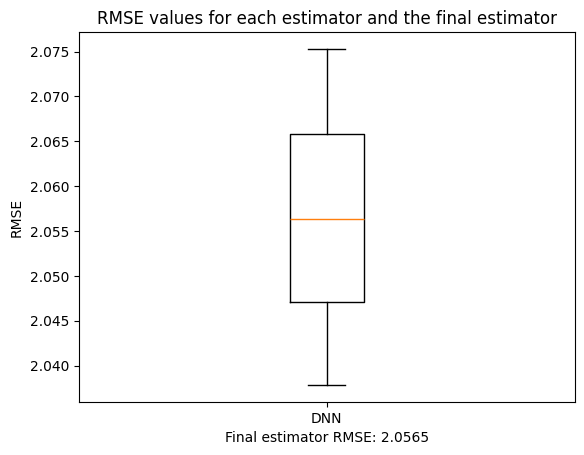

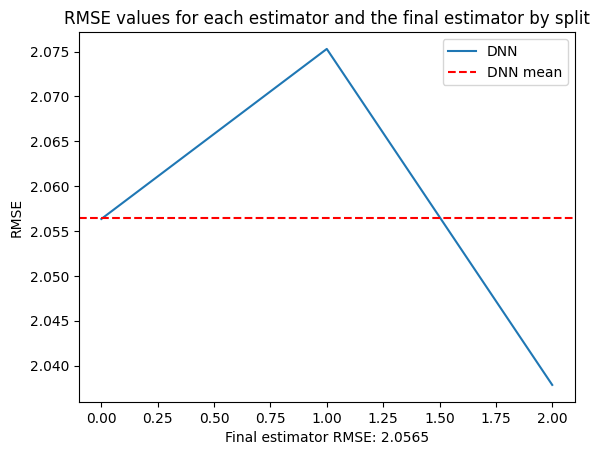

In [6]:
from tensorflow.keras import regularizers

input_dim = X_train.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=[rmse])
score = calculate_dnn_performance(model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()

## More improvements

13:59:30 - Start training DNN


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 256)            │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 192)            │        49,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,097 (422.25 KB)

 Trainable params: 106,753 (417.00 KB)

 Non-trainable params: 1,344 (5.25 KB)

13:59:30 - Split 1/3
Epoch 1/50
8934/8934 - 20s - 2ms/step - loss: 7.5023 - rmse: 2.4915 - val_loss: 5.1185 - val_rmse: 2.1351
Epoch 2/50
8934/8934 - 19s - 2ms/step - loss: 5.4589 - rmse: 2.2234 - val_loss: 5.9946 - val_rmse: 2.3438
Epoch 3/50
8934/8934 - 18s - 2ms/step - loss: 5.2586 - rmse: 2.1885 - val_loss: 5.0962 - val_rmse: 2.1582
Epoch 4/50
8934/8934 - 71s - 8ms/step - loss: 5.1528 - rmse: 2.1701 - val_loss: 4.8898 - val_rmse: 2.1122
Epoch 5/50
8934/8934 - 71s - 8ms/step - loss: 5.1009 - rmse: 2.1599 - val_loss: 4.7933 - val_rmse: 2.0932
Epoch 6/50
8934/8934 - 47s - 5ms/step - loss: 5.0504 - rmse: 2.1507 - val_loss: 5.2787 - val_rmse: 2.2027
Epoch 7/50
8934/8934 - 45s - 5ms/step - loss: 5.0477 - rmse: 2.1506 - val_loss: 4.8687 - val_rmse: 2.1119
Epoch 8/50
8934/8934 - 36s - 4ms/step - loss: 5.0099 - rmse: 2.1413 - val_loss: 5.0033 - val_rmse: 2.1422
Epoch 9/50
8934/8934 - 23s - 3ms/step - loss: 4.9813 - rmse: 2.1357 - val_loss: 4.8942 - val_rmse: 2.1153
Epoch 10/50
8934/8934 - 1

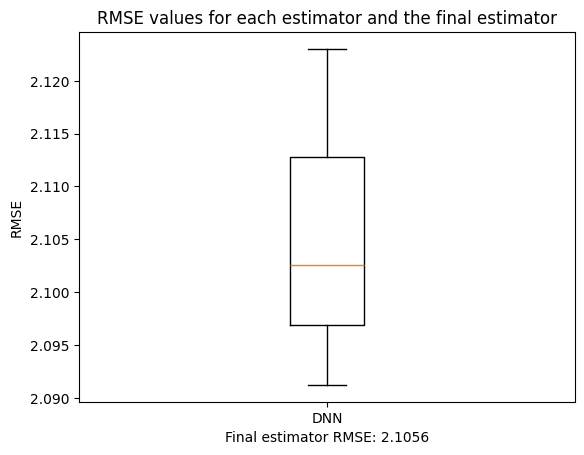

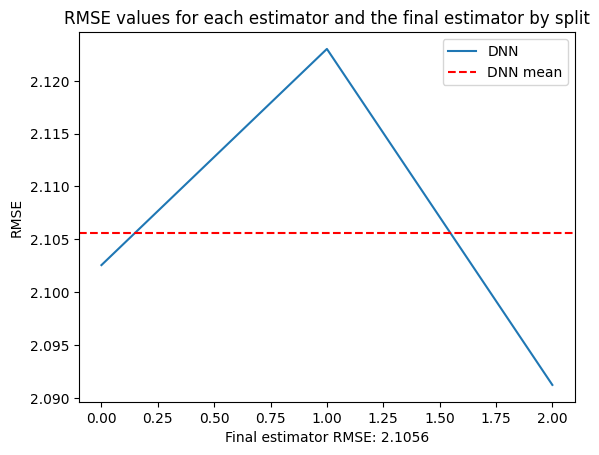

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU

input_dim = X_train.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),

    # Hidden Layers
    Dense(256, kernel_regularizer=regularizers.l2(1e-3)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.5),

    Dense(192, kernel_regularizer=regularizers.l2(1e-3)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.4),

    Dense(128, kernel_regularizer=regularizers.l2(1e-3)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.3),

    Dense(64, kernel_regularizer=regularizers.l2(1e-3)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.2),

    Dense(32, kernel_regularizer=regularizers.l2(1e-3)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.1),

    # Output Layer
    Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[rmse]
)

score = calculate_dnn_performance(model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()